In [ ]:
"""
*******************************
Author:
u3271594
u3258842
u3249011
u3267891
Assessment_3_Capstone_Project
Programming:
*******************************
"""

'\n*******************************\nAuthor:\nu3271594\nu3258842\nu3249011\nu3267891\nAssessment_3_Capstone_Project\nProgramming:\n*******************************\n'

#**Software Technology Assignment 3 (Capstone Project)**

### This Project is based on the Furniture Price Prediction data available from Kaggle repository (https://www.kaggle.com/datasets/shawkyelgendy/furniture-price-prediction).

*   It contains information about various types of furniture and information about furniture prices sold
on Jumia.com.
*   My project task is to create a machine learning model which can predict the average price of house based on its characteristics.
* For solving this problem, I will approach the task, with a step by step approach to create a data analysis and prediction model based on (machine learning/AI algorithms, regression algorith for example) available from different Python packages, modules and classes.

###About the dataset
This dataset contains 2000 rows of listings for data analyst and machine learning positions, with features such as:

*   Furniture: It has the furniture name
*   Type: It has the type of furniture
*   Url: It has the link to the furniture page
*   Rate: It has the rate of furniture
*   Delivery: It has the price of delivery to a house
*   Sale: It has the percentage of discounts on furniture
*   Price: It has the price of furniture


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

import joblib
from sklearn.preprocessing import LabelEncoder
from pandas.errors import SettingWithCopyWarning

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

##**Step 1: Load dataset**

In [ ]:
df = pd.read_csv('Furniture Price Prediction.csv')
print(df)

#preprocessing data
del df['url']

encoder=LabelEncoder()

df['sale']=df['sale'].str.replace('%','')
df['sale']=df['sale'].astype(float)
for i in range(len(df['sale'])):
    df['sale'][i] = df['sale'][i]/100

log_price = np.log1p(df['price'])
df['log_price'] = log_price

continuous_df = df.select_dtypes(include=['float64', 'int64'])
categorical_df = df.select_dtypes(include=['object'])

#df['type']=encoder.fit_transform(df['type'])
#df['furniture'] = encoder.fit_transform(df['furniture'])

                                              furniture  \
0                    Bed side table with storage shelf    
1                    Bed side table with storage shelf    
2                               Modern Zigzag TV Table    
3                     Bedside table with storage shelf    
4     Wall Mounted TV Unit with Cabinet TV Stand Uni...   
...                                                 ...   
1995  Casio Standard Analogue Ladys Standard Analog ...   
1996                          Coffee table + side table   
1997                                 Ben Togo Baby Bed    
1998               Cloud memory foam mattress (medical)   
1999                         Comfy memory foam mattress   

                                                   type  \
0                                     Home Decor Center   
1                                           Modern Home   
2                                           Modern Home   
3                                           Modern Home

##**Step 2: Problem statements**

In [ ]:
target = df['price']
features = df.drop('price', axis=1)
print("The target value to be used for the prediction is 'Price'.")
print("The features used for the prediction are 'type', 'sale', 'furniture', 'rate', and 'delivery'")

The target value to be used for the prediction is 'Price'.
The features used for the prediction are 'type', 'sale', 'furniture', 'rate', and 'delivery'


##**Step 3: Visualising the distribution of Target variable**

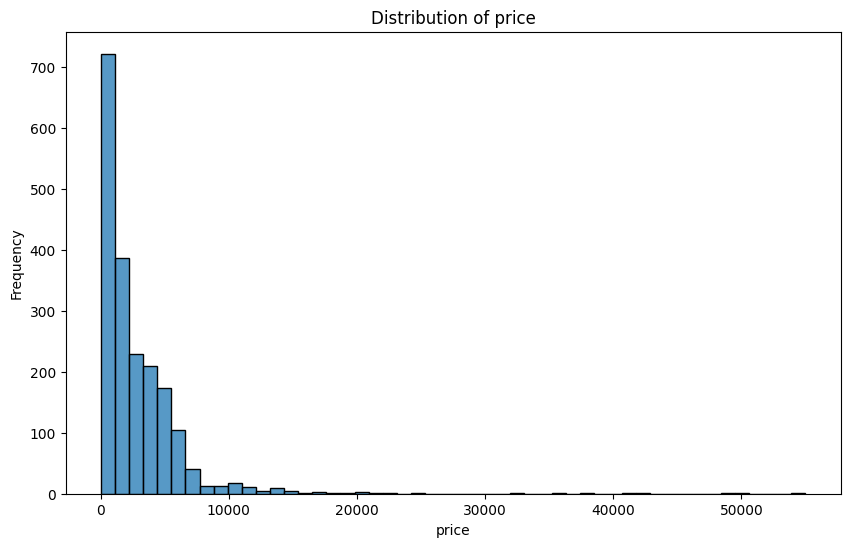

In [ ]:
def hist_visualise(df, column_name):
    plt.figure(figsize=(10,6))
    sns.histplot(df[column_name], bins=50)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

hist_visualise(df, 'price')

The graph has a right-skewed / positive distribution. This means that items less than $10,000 has a more higher demand.

##**Step 4: Data exploration at basic level**

In [ ]:
def data_exploration(df):
    print("Missing values:")
    print(df.isnull().sum(), end="\n")
    print("Duplicate values:")
    print(df.duplicated().sum(), end="\n")
    print("Unique values:")
    print(df.nunique(), end="\n")
    print("Summary statistics of the data:")
    print(df.describe().T, end="\n")
    print("First 10 rows of the data:")
    print(df.head(10), end="\n")
    print(df.shape)

dataExploration = data_exploration(df)
print(dataExploration)

Missing values:
furniture     0
type          0
rate          0
delivery      0
sale          0
price        39
log_price    39
dtype: int64
Duplicate values:
304
Unique values:
furniture    1224
type          592
rate           26
delivery      314
sale           81
price         693
log_price     693
dtype: int64
Summary statistics of the data:
            count         mean          std        min         25%  \
rate       2000.0     0.743450     1.611737   0.000000    0.000000   
delivery   2000.0   142.673285   139.339128  10.830000   52.440000   
sale       2000.0     0.232050     0.208484   0.000000    0.000000   
price      1961.0  2910.418195  4002.917206  13.400000  740.000000   
log_price  1961.0     7.377768     1.186659   2.667228    6.608001   

                   50%        75%           max  
rate          0.000000     0.0000      5.000000  
delivery    172.140000   172.1400   2409.900000  
sale          0.170000     0.4000      0.900000  
price      1900.000000  4000.0

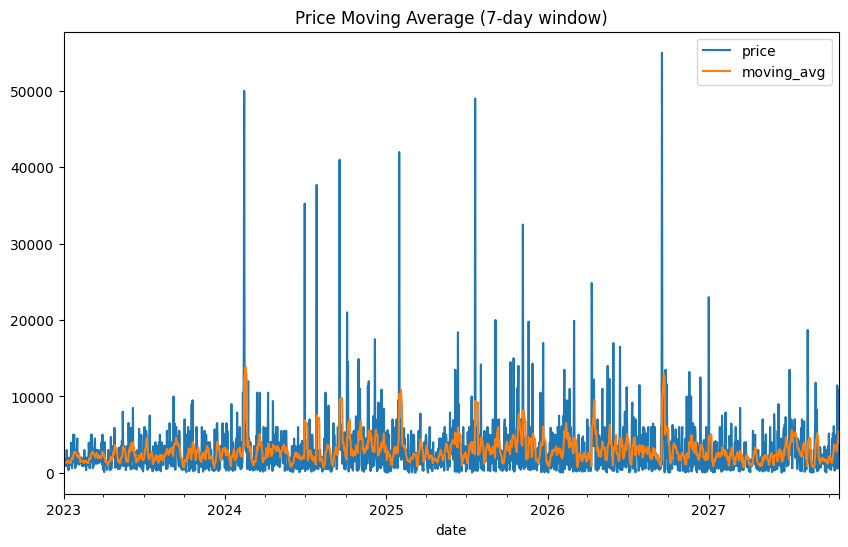

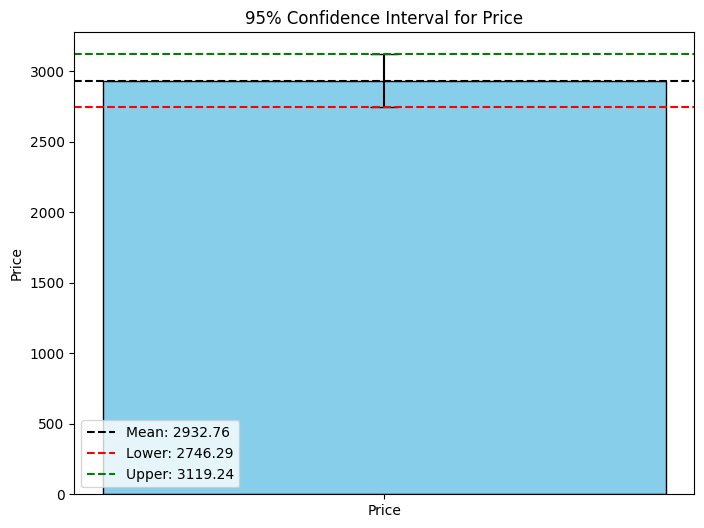

In [ ]:
# Create a dummy 'date' column
df['date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')
df.set_index('date', inplace=True)

# Moving average calculation for price
df['moving_avg'] = df['price'].rolling(window=7).mean()
df[['price', 'moving_avg']].plot(figsize=(10, 6), title='Price Moving Average (7-day window)')
plt.show()


# Calculate the confidence interval
import scipy.stats
price = df['price']

def mean_confidence_interval(price, confidence=0.95):
    a = 1.0 * np.array(price)
    n = len(a)
    m, se = np.nanmean(a), scipy.stats.sem(a, nan_policy='omit')
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

mean, lower, upper = mean_confidence_interval(price)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar('Price', mean, yerr=[[mean - lower], [upper - mean]], capsize=10, color='skyblue', edgecolor='black')
ax.axhline(mean, color='black', linestyle='--', label=f'Mean: {mean:.2f}')
ax.axhline(lower, color='red', linestyle='--', label=f'Lower: {lower:.2f}')
ax.axhline(upper, color='green', linestyle='--', label=f'Upper: {upper:.2f}')
ax.set_title('95% Confidence Interval for Price')
ax.set_ylabel('Price')
ax.legend()
plt.show(fig)

The chart uses a 7-day moving average (orange) to smooth out price fluctuations, highlighting consistent trends, while the raw price (blue) captures extreme spikes. This helps identify patterns and anomalies over time.

##**Step 5: Visual Exploratory Data Analysis(EDA) of data (with histograms and barcharts)**

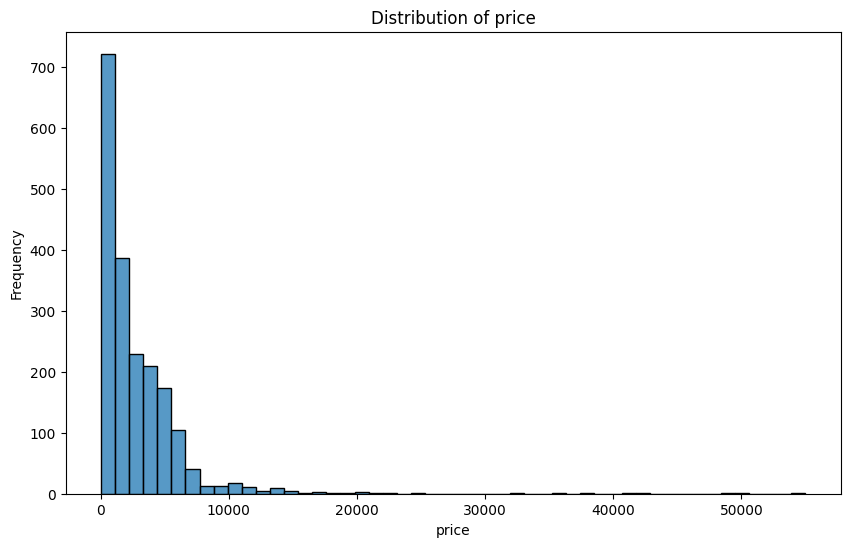

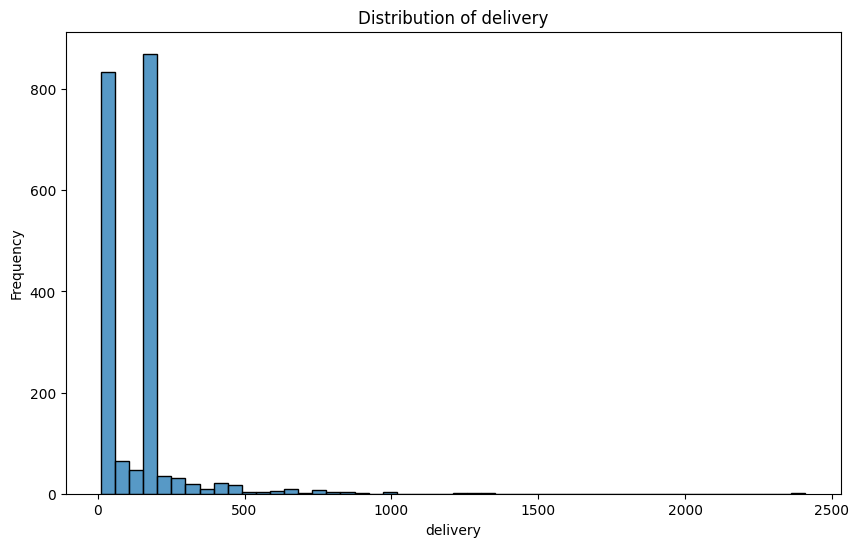

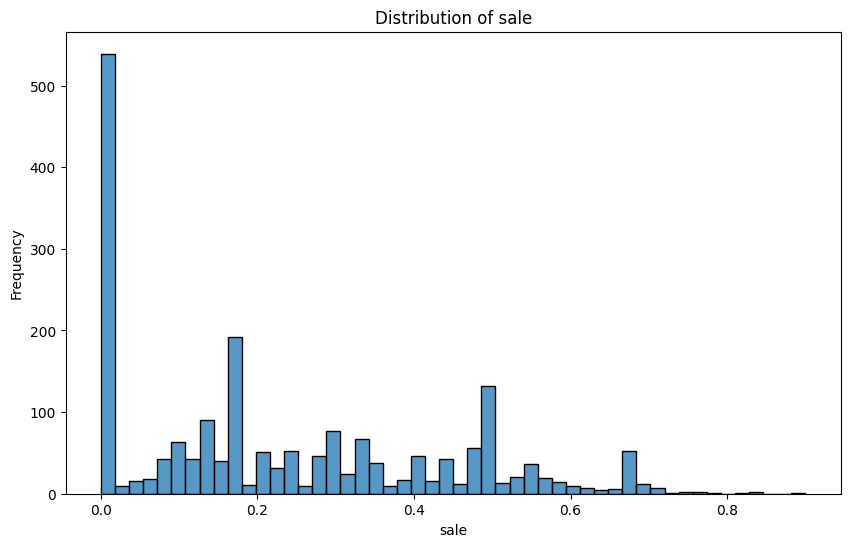

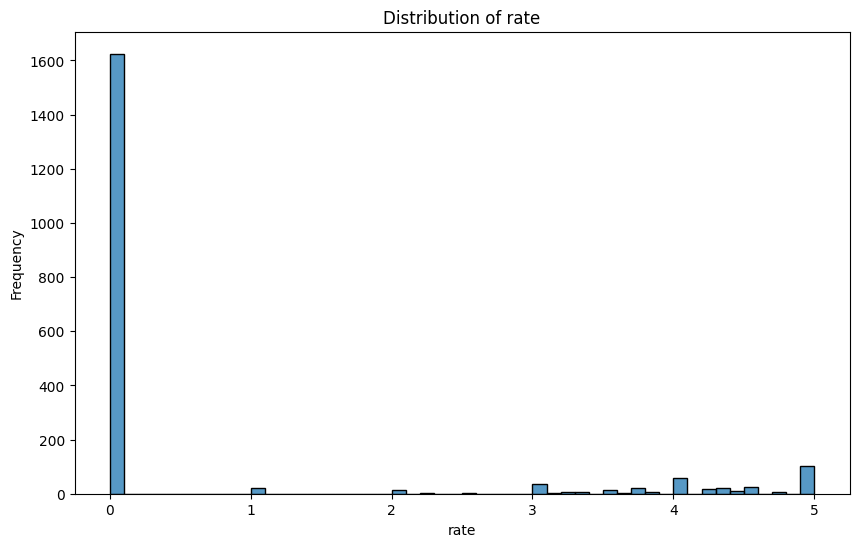

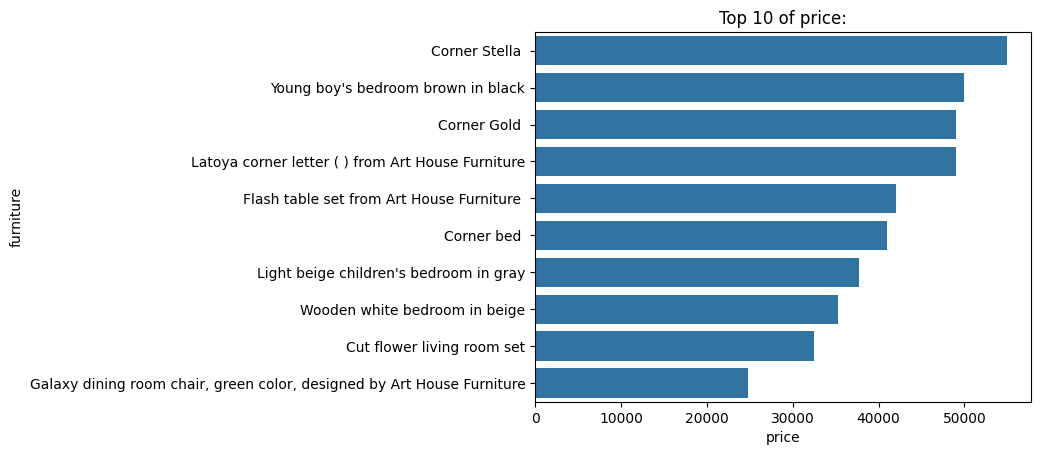

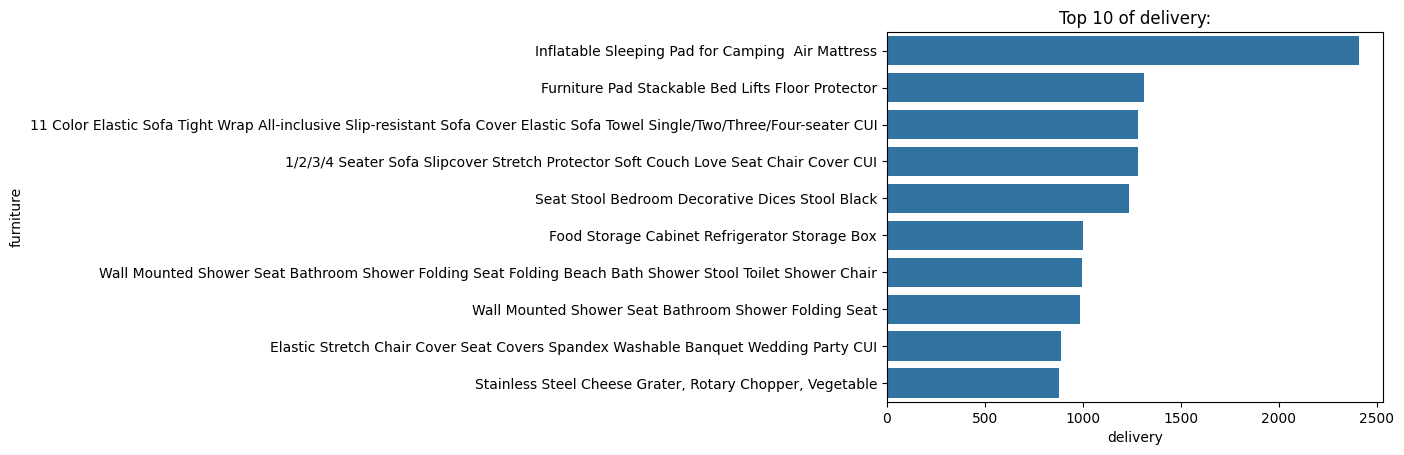

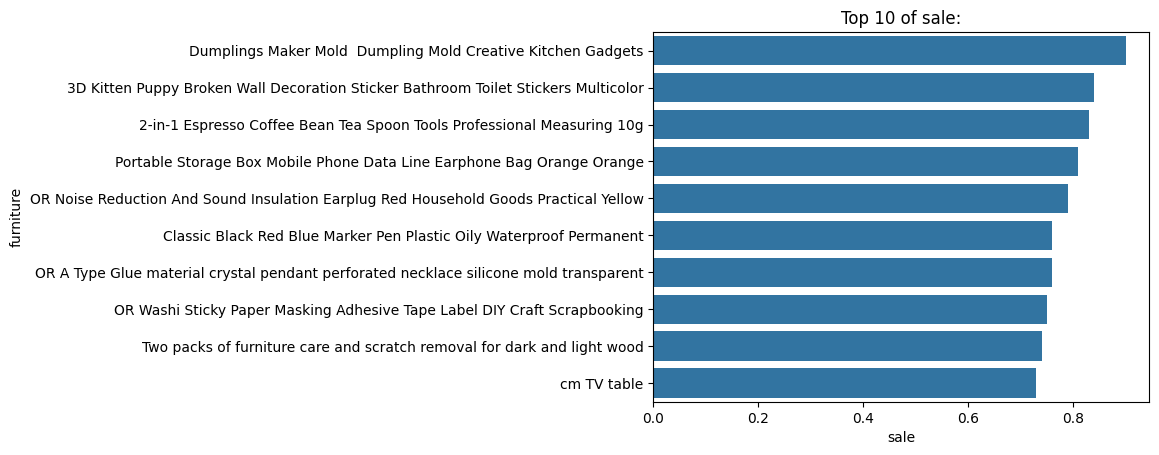

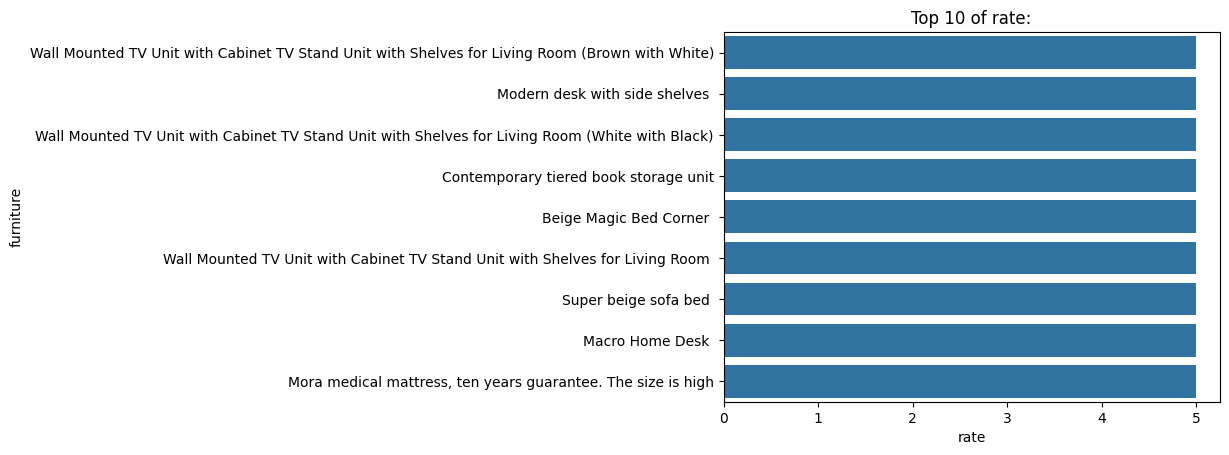

In [ ]:
def EDA_Visualise(df, column_name):
    plt.figure(figsize=(10,6))
    sns.histplot(df[column_name], bins=50)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

def bar_chart(df, column_name):
    top_10 = df.nlargest(10, column_name)
    sns.barplot(x=column_name, y=df.columns[0], data=top_10)
    plt.title(f'Top 10 of {column_name}:')
    plt.xlabel(column_name)
    plt.ylabel(df.columns[0])
    plt.show()

EDA_Visualise(df, 'price')
EDA_Visualise(df, 'delivery')
EDA_Visualise(df, 'sale')
EDA_Visualise(df, 'rate')

bar_chart(df, 'price')
bar_chart(df, 'delivery')
bar_chart(df,'sale')
bar_chart(df, 'rate')

- The histograms display the distribution of selected features.
- The barcharts display the top ten products by each category.

##**Step 6: Checking and handling outliers**

In [ ]:
#identify outliers with continuous variables
Q1 = continuous_df.quantile(0.25)
Q3 = continuous_df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((continuous_df < (Q1 - 1.5 * IQR)) | (continuous_df > (Q3 + 1.5 * IQR)))
print("Outliers:")
print(outliers.sum())

Outliers:
rate         375
delivery      96
sale           0
price         83
log_price     28
dtype: int64


##**Step 7: Missing values analysis**

In [ ]:
print("Step 7: Missing values analysis")
print("Missing values:")
print(df.isnull().sum())
#Dropping missing values
print("Handle missing values")
df.dropna(inplace=True)
print(df.isnull().sum())

Step 7: Missing values analysis
Missing values:
furniture       0
type            0
rate            0
delivery        0
sale            0
price          39
log_price      39
moving_avg    244
dtype: int64
Handle missing values
furniture     0
type          0
rate          0
delivery      0
sale          0
price         0
log_price     0
moving_avg    0
dtype: int64


##**Step 8: Feature selection - Visual and statistic correlation analysis for selection of best features**

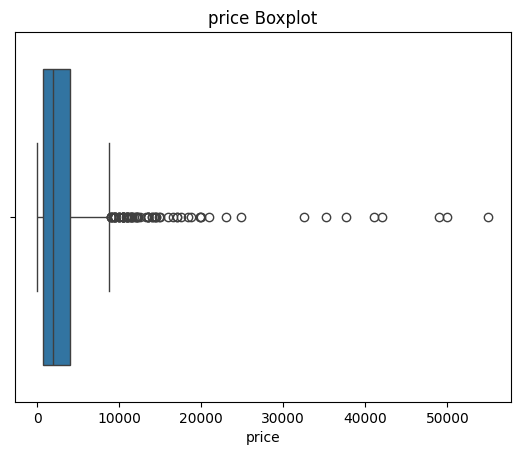

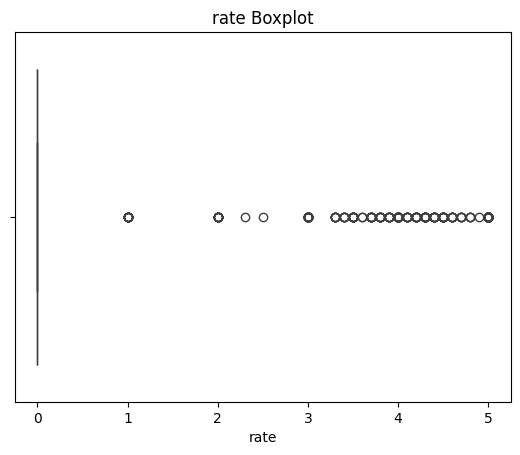

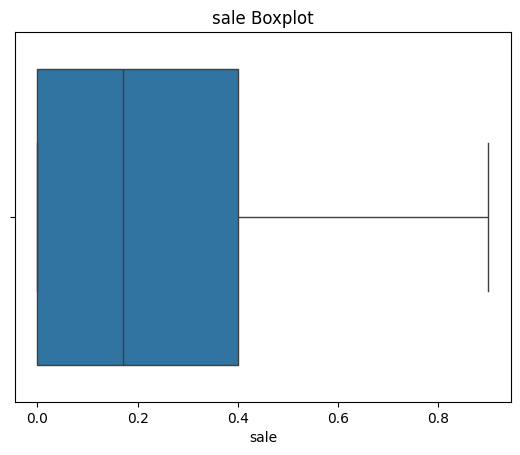

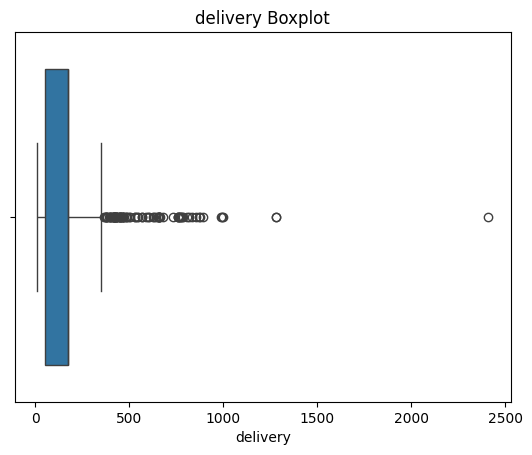

In [ ]:
def boxplot(df, column_name):
  sns.boxplot(x=df[column_name])
  plt.title(f'{column_name} Boxplot')
  plt.show()

boxplot(df, 'price')
boxplot(df, 'rate')
boxplot(df, 'sale')
boxplot(df, 'delivery')

The boxplots above describe the distribution of each selected features. These plots show a in-depth details on outliers in each feature.

###Pair plot

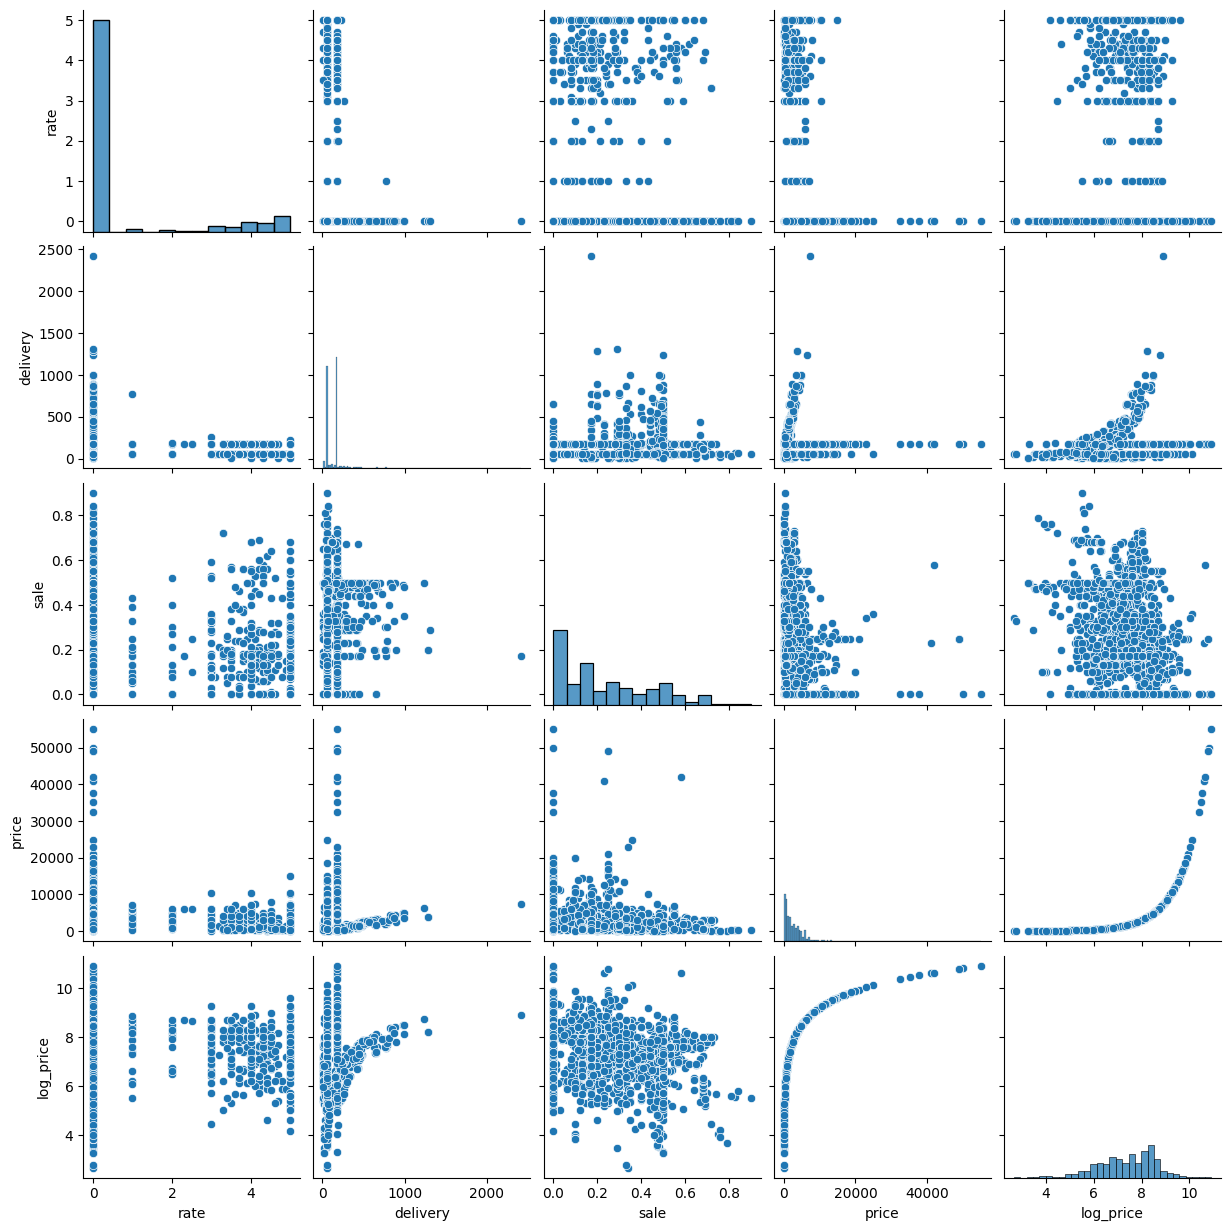

In [ ]:
sns.pairplot(continuous_df)
plt.show()

###Correlation Matrix

               rate  delivery      sale  log_price
rate       1.000000 -0.112733 -0.024322   0.057615
delivery  -0.112733  1.000000  0.112596   0.227983
sale      -0.024322  0.112596  1.000000  -0.203238
log_price  0.057615  0.227983 -0.203238   1.000000


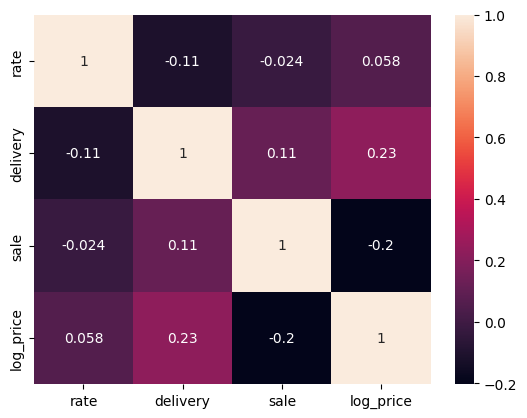

rate        0.057615
delivery    0.227983
sale       -0.203238
Name: log_price, dtype: float64
Strong Correlations:
Series([], Name: log_price, dtype: float64)
Moderate Correlations:
Series([], Name: log_price, dtype: float64)
Weak Correlations:
rate        0.057615
delivery    0.227983
sale       -0.203238
Name: log_price, dtype: float64


In [ ]:
corr_df = continuous_df.drop('price', axis=1)
corr_matrix = corr_df.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True)
plt.show()

#Identify strong, moderate, and weak relationships
target_correlations = corr_matrix['log_price'].drop('log_price')
print(target_correlations)
strong_corr = target_correlations[target_correlations.abs() >= 0.7]
moderate_corr = target_correlations[(target_correlations.abs() >= 0.3) & (target_correlations.abs() < 0.7)]
weak_corr = target_correlations[target_correlations.abs() < 0.3]
print("Strong Correlations:")
print(strong_corr)

print("Moderate Correlations:")
print(moderate_corr)

print("Weak Correlations:")
print(weak_corr)

The pairplot and correlation matrix are made to show the relationship between the target variable with its features. As shown in the pair plots, the scatterplots of “price” with “rate”, “delivery”, “sale”, and “log_price” are mostly non-linear and weak. On the other hand, the correlation analysis showed that most of the correlations are weak.

##**Step 9: ANOVA test**

In [ ]:
#ANOVA test for check if there is any relationship between price and other variables.
from scipy.stats import f_oneway
f_val, p_val = f_oneway(df['price'], df['delivery'], df['sale'], df['rate'], df['log_price'])
print("ANOVA test results: F-value =", f_val, ", p-value =", p_val, ", Level of Significance = 0.05")
#If p-value is less than 0.05, we reject the null hypothesis.
if p_val < 0.05:
    print("There is a relationship between price and other variables.")
else:
    print("There is no relationship between price and other variables.")

ANOVA test results: F-value = 927.9406323589096 , p-value = 0.0 , Level of Significance = 0.05
There is a relationship between price and other variables.


##**Step 10: Selecting final predictors/features for building machine learning/AI model.**
In this case, we selected 5 models to train which are: Linear Regression, Decision Tree, Random Forest, K-Nearest Neighbour, and Support Vector Regression.

##**Step 11: Data conversion to numeric values for machine learning/predictive analysis**

As the get_dummies() method was not effective in this case with unexpected characters, such as Arabic characters, we decided to use LabelEncoder from sci-kit learn instead.

In [ ]:
df['type']=encoder.fit_transform(df['type'])
df['furniture'] = encoder.fit_transform(df['furniture'])

##**Step 12 and 13: Train/test data split and standardisation/normalisation of data and Investigating multiple regression algorithms**

In [ ]:
del df['log_price']
#Splitting the data to predict the price
X = df.drop('price', axis=1)
y = df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)

#Decision Tree
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)

#Random Forest
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)

#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor
model4 = KNeighborsRegressor()
model4.fit(X_train, y_train)

#Support Vector Regression
from sklearn.svm import SVR
model5 = SVR()
model5.fit(X_train, y_train)


SVR()

In [ ]:
#Cross-validation
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(model1, X_train, y_train, cv=5)
scores2 = cross_val_score(model2, X_train, y_train, cv=5)
scores3 = cross_val_score(model3, X_train, y_train, cv=5)
scores4 = cross_val_score(model4, X_train, y_train, cv=5)
scores5 = cross_val_score(model5, X_train, y_train, cv=5)

print('Linear Regression:', scores1.mean())
print('Decision Tree:', scores2.mean())
print('Random Forest:', scores3.mean())
print('K-Nearest Neighbors:', scores4.mean())
print('Support Vector Regression:', scores5.mean())

Linear Regression: 0.19696772835939907
Decision Tree: -0.46409848301823386
Random Forest: 0.3596008320680719
K-Nearest Neighbors: 0.018909906182017332
Support Vector Regression: -0.06993139833288722


In [ ]:
#Predicting the price
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)
y_pred5 = model5.predict(X_test)

In [ ]:
#Evaluate the models
from sklearn.metrics import mean_squared_error, r2_score
mse1 = mean_squared_error(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)
mse3 = mean_squared_error(y_test, y_pred3)
mse4 = mean_squared_error(y_test, y_pred4)
mse5 = mean_squared_error(y_test, y_pred5)

r2_score1 = r2_score(y_test, y_pred1)
r2_score2 = r2_score(y_test, y_pred2)
r2_score3 = r2_score(y_test, y_pred3)
r2_score4 = r2_score(y_test, y_pred4)
r2_score5 = r2_score(y_test, y_pred5)

"""Mean Squared Errors"""
print('Mean Squared Errors of Models')
print('Linear Regression MSE:', mse1)
print('Tree Decision MSE:', mse2)
print('Random Forest Decision MSE:', mse3)
print('K-Nearest Neighbors MSE:', mse4)
print('Support Vector Regression MSE:', mse5)

"""R-squared Scores"""
print("R-squared Scores of models")
print('Linear Regression R-squared:', r2_score1)
print('Tree Decision R-squared:', r2_score2)
print('Random Forest Decision R-squared:', r2_score3)
print('K-Nearest Neighbors R-squared:', r2_score4)
print('Support Vector Regression R-squared:', r2_score5)

Mean Squared Errors of Models
Linear Regression MSE: 12192267.740356967
Tree Decision MSE: 18166023.43542784
Random Forest Decision MSE: 8255667.495868867
K-Nearest Neighbors MSE: 11538675.217111863
Support Vector Regression MSE: 15503188.078344995
R-squared Scores of models
Linear Regression R-squared: 0.1724383834683545
Tree Decision R-squared: -0.2330358912979602
Random Forest Decision R-squared: 0.43963881995352483
K-Nearest Neighbors R-squared: 0.2168015894451517
Support Vector Regression R-squared: -0.05229344210035247


In [ ]:
#Evaluate the models using cross-validation
from sklearn.model_selection import cross_val_score

cross_val_mse1 = cross_val_score(model1, X, y, cv=5, scoring='neg_mean_squared_error')
cross_val_mse2 = cross_val_score(model2, X, y, cv=5, scoring='neg_mean_squared_error')
cross_val_mse3 = cross_val_score(model3, X, y, cv=5, scoring='neg_mean_squared_error')
cross_val_mse4 = cross_val_score(model4, X, y, cv=5, scoring='neg_mean_squared_error')
cross_val_mse5 = cross_val_score(model5, X, y, cv=5, scoring='neg_mean_squared_error')

cross_val_mse1 = cross_val_mse1 * -1
cross_val_mse2 = cross_val_mse2 * -1
cross_val_mse3 = cross_val_mse3 * -1
cross_val_mse4 = cross_val_mse4 * -1
cross_val_mse5 = cross_val_mse5 * -1

print('Cross-Validation Mean Squared Errors of Models')

print('Linear Regression Cross-Validation MSE:', cross_val_mse1)
print('Decision Tree Cross-Validation MSE:', cross_val_mse2)
print('Random Forest Decision Cross-Validation MSE:', cross_val_mse3)
print('K-Nearest Neighbors Cross-Validation MSE:', cross_val_mse4)
print('Support Vector Regression Cross-Validation MSE:', cross_val_mse5)

Cross-Validation Mean Squared Errors of Models
Linear Regression Cross-Validation MSE: [ 3217494.43983786 20273525.69688978 18631552.81828284 15496380.76007301
  6218831.9072752 ]
Decision Tree Cross-Validation MSE: [ 4135424.0465696  27300658.19347664 17588073.12247065 17862460.82859288
  7846046.60779288]
Random Forest Decision Cross-Validation MSE: [ 1962082.61467062 18538428.40449614  9764025.5669464   9191563.78763086
  4377481.37301818]
K-Nearest Neighbors Cross-Validation MSE: [ 3239339.92123013 22361010.87735195 20851075.28332493 14873873.42130971
  7029071.00541177]
Support Vector Regression Cross-Validation MSE: [ 3408162.33877922 26479585.2569894  25028166.95324051 21110035.15527256
  8245879.88137136]


In [ ]:
#Save the models
import joblib
joblib.dump(model1, 'linear_regression_model.pkl')
joblib.dump(model2, 'decision_tree_model.pkl')
joblib.dump(model3, 'random_forest_model.pkl')
joblib.dump(model4, 'knn_model.pkl')
joblib.dump(model5, 'svr_model.pkl')

['svr_model.pkl']

In [ ]:
#Coefficients
"""Coefficients"""
coefficients = pd.DataFrame({'Feature': X.columns,
                             'Linear Regression Coefficient': model1.coef_[0],
                             'Decision Tree Coefficient': model2.feature_importances_,
                             'Random Forest Coefficient': model3.feature_importances_})
coefficients.sort_values(by='Linear Regression Coefficient', ascending=False, inplace=True)
print("Coefficients:")
print(coefficients)

Coefficients:
      Feature  Linear Regression Coefficient  Decision Tree Coefficient  \
0   furniture                       0.687838                   0.171649   
1        type                       0.687838                   0.333863   
2        rate                       0.687838                   0.008447   
3    delivery                       0.687838                   0.128562   
4        sale                       0.687838                   0.065674   
5  moving_avg                       0.687838                   0.291805   

   Random Forest Coefficient  
0                   0.174173  
1                   0.245156  
2                   0.008945  
3                   0.114663  
4                   0.094932  
5                   0.362131  


In [ ]:
#Regression metrics
models = [model1, model2, model3, model4, model5]
"""Regression metrics"""
regression_metrics = pd.DataFrame({'Model': models,
                                 'Mean Squared Error': [mean_squared_error(y_test, y_pred1),
                                                        mean_squared_error(y_test, y_pred2),
                                                        mean_squared_error(y_test, y_pred3),
                                                        mean_squared_error(y_test, y_pred4),
                                                        mean_squared_error(y_test, y_pred5)]})

regression_metrics.sort_values(by='Mean Squared Error', ascending=False, inplace=True)
print("Regression Metrics")
print(regression_metrics)

Regression Metrics
                                               Model  Mean Squared Error
1                            DecisionTreeRegressor()        1.816602e+07
4                                              SVR()        1.550319e+07
0                                 LinearRegression()        1.219227e+07
3                              KNeighborsRegressor()        1.153868e+07
2  (DecisionTreeRegressor(max_features=1.0, rando...        8.255667e+06


##**Step 14: Selection of the best model**

In [ ]:
#Selection of best models based on the lowest mean square error
best_models = ['Linear Regression',
               'Decision Tree',
               'Random Forest',
               'K-Nearest Neighbors',
               'Support Vector Regression']
best_mse = [mse1, mse2, mse3, mse4, mse5]
best_r2_score = [r2_score1, r2_score2, r2_score3, r2_score4, r2_score5]

best_comparison_df = pd.DataFrame({'Model': best_models,
                                   'MSE': best_mse,
                                   'R-squared': best_r2_score})
best_comparison_df.sort_values(by=['MSE'], ascending=True, inplace=True)

After getting the MSEs, we compare the MSE of each model to find the best model

In [ ]:
#Conclusion

print('Best models based on Lowest MSE:')
print(best_comparison_df)


Best models based on Lowest MSE:
                       Model           MSE  R-squared
2              Random Forest  8.255667e+06   0.439639
3        K-Nearest Neighbors  1.153868e+07   0.216802
0          Linear Regression  1.219227e+07   0.172438
4  Support Vector Regression  1.550319e+07  -0.052293
1              Decision Tree  1.816602e+07  -0.233036


**Based on the valuation above, the best model to predict the furniture price is Random Forest.**

##**Step 15: Deployment of the best model in production**

###Load the save Random Forest model, repredict, and evaluate with 100% of the data



Prediction:
3022.7174
MSE: 2820297.476859549
R-squared: 0.8222306238957945


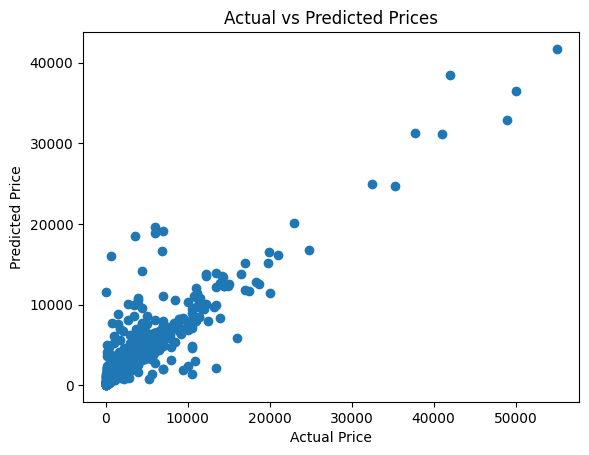

In [ ]:
#Load the models
loaded_model3 = joblib.load('random_forest_model.pkl')

#Make predictions with 100% of data
X = df.drop(columns=['price'])
y = df['price']
true_prediction = loaded_model3.predict(X)
print("Prediction:")
print(f"{np.mean(true_prediction):.4f}")

#Evaluate the loaded models
loaded_mse3 = mean_squared_error(y, true_prediction)

loaded_r2_score3 = r2_score(y, true_prediction)

print("MSE:", loaded_mse3)
print("R-squared:", loaded_r2_score3)

#Visualise the prediction
plt.scatter(y, true_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

- Scatterplot of Actual vs Predicted price: With the loaded Random Forest R-squared of 0.8746, which is closer to 1, the points lie along a straight line with a slope of 1, indicating that the predicted price tends to equal to the increase of the actual price.

###Save the model as a serialised file which can be stored anywhere.

In [ ]:
#Save Random Forest model as the best model
best_model = loaded_model3
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

###Create a python function which gets integrated with front-end viewer(GUI/ website etc.) to take all the inputs and returns the prediction.




###Test the python function created with new unseen data. This ensures the prediction API has been successfully created and working.


###Implement the machine learning/AI model available as the new python function now, as a desktop application with TkInter GUI library. Another option is to implement it as a web application with Flask or Streamlit Library.

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import warnings
from pandas.errors import SettingWithCopyWarning

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)


#STEP 1
st.write("## Step 1: Load dataset")
st.sidebar.title("Upload Dataset(s)")
uploaded_files = st.sidebar.file_uploader("Choose one or more CSV files", type="csv", accept_multiple_files=True)

if uploaded_files:
    for uploaded_file in uploaded_files:
        df = pd.read_csv(uploaded_file)

st.write(df)

#preprocessing data
del df['url']

encoder=LabelEncoder()

df['sale']=df['sale'].str.replace('%','')
df['sale']=df['sale'].astype(float)
for i in range(len(df['sale'])):
    df['sale'][i] = df['sale'][i]/100

log_price = np.log1p(df['price'])
df['log_price'] = log_price

continuous_df = df.select_dtypes(include=['float64', 'int64'])
categorical_df = df.select_dtypes(include=['object'])


#STEP 2
st.write("## Step 2: Problem statements")

target = df['price']
features = df.drop('price', axis=1)
st.write("The target value to be used for the prediction is 'Price'.")
st.write("The features used for the prediction are 'type', 'sale', 'furniture', 'rate', and 'delivery'")


#STEP 3
st.write("## Step 3: Visualising the distribution of Target variable")
def hist_visualise(df, column_name):
    fig, ax = plt.subplots(figsize=(10,6))
    #plt.figure(figsize=(10,6))
    sns.histplot(df[column_name], bins=50)
    ax.set_title(f'Distribution of {column_name}')
    ax.set_xlabel(column_name)
    ax.set_ylabel('Frequency')
    st.pyplot(fig)

hist_visualise(df, 'price')
st.write("The graph has a right-skewed / positive distribution. This means that items less than $10,000 has a more higher demand.")


#STEP 4
st.write("## Step 4: Data exploration at basic level")
def data_exploration(df):
    st.write("Missing values:")
    st.write(df.isnull().sum(), end="\n")
    st.write("Duplicate values:")
    st.write(df.duplicated().sum(), end="\n")
    st.write("Unique values:")
    st.write(df.nunique(), end="\n")
    st.write("Summary statistics of the data:")
    st.write(df.describe().T, end="\n")
    st.write("First 10 rows of the data:")
    st.write(df.head(10), end="\n")
    #st.write(df.shape)

dataExploration = data_exploration(df)
#st.write(dataExploration)

# Create a dummy 'date' column
df['date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')
df.set_index('date', inplace=True)

# Moving average calculation for price
st.write("Analysis Time Series")
st.write("Trend analysis using moving averages or statistics (7 days window")
df['moving_avg'] = df['price'].rolling(window=7).mean()
df[['price', 'moving_avg']].plot(figsize=(10, 6), title='Price Moving Average (7-day window)')
st.pyplot(plt.gcf())

# Calculate the confidence interval
import scipy.stats
price = df['price']

def mean_confidence_interval(price, confidence=0.95):
    a = 1.0 * np.array(price)
    n = len(a)
    m, se = np.nanmean(a), scipy.stats.sem(a, nan_policy='omit')
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

mean, lower, upper = mean_confidence_interval(price)

# Create the plot
st.write("Confidence Intervals, data variability and prediction accuracy:")
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar('Price', mean, yerr=[[mean - lower], [upper - mean]], capsize=10, color='skyblue', edgecolor='black')
ax.axhline(mean, color='black', linestyle='--', label=f'Mean: {mean:.2f}')
ax.axhline(lower, color='red', linestyle='--', label=f'Lower: {lower:.2f}')
ax.axhline(upper, color='green', linestyle='--', label=f'Upper: {upper:.2f}')
ax.set_title('95% Confidence Interval for Price')
ax.set_ylabel('Price')
ax.legend()
st.pyplot(fig)


#STEP 5
st.write("## Step 5: Visualising the distribution of Target variable")
def EDA_Visualise(df, column_name):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.histplot(df[column_name], bins=50)
    ax.set_title(f'Distribution of {column_name}')
    ax.set_xlabel(column_name)
    ax.set_ylabel('Frequency')
    st.pyplot(fig)

def bar_chart(df, column_name):
    top_10 = df.nlargest(10, column_name)
    fig, ax = plt.subplots(figsize=(10,6))
    sns.barplot(x=column_name, y=df.columns[0], data=top_10)
    ax.set_title(f'Top 10 of {column_name}:')
    ax.set_xlabel(column_name)
    ax.set_ylabel(df.columns[0])
    st.pyplot(fig)

EDA_Visualise(df, 'price')
EDA_Visualise(df, 'delivery')
EDA_Visualise(df, 'sale')
EDA_Visualise(df, 'rate')

bar_chart(df, 'price')
bar_chart(df, 'delivery')
bar_chart(df,'sale')
bar_chart(df, 'rate')


#STEP 6
st.write("## Step 6: Checking and handling outliers")

#identify outliers with continuous variables
Q1 = continuous_df.quantile(0.25)
Q3 = continuous_df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((continuous_df < (Q1 - 1.5 * IQR)) | (continuous_df > (Q3 + 1.5 * IQR)))
st.write("Outliers:")
st.write(outliers.sum())


#STEP 7
st.write("## Step 7: Missing values analysis")

st.write("Missing values:")
st.write(df.isnull().sum())
#Dropping missing values
df.dropna(inplace=True)


#STEP 8
st.write("## Step 8: Feature selection - Visual and statistic correlation analysis for selection of best features")
st.write("Box Plot")
def boxplot(df, column_name):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.boxplot(x=df[column_name])
    ax.set_title(f'{column_name} Boxplot')
    st.pyplot(fig)

boxplot(df, 'price')
boxplot(df, 'rate')
boxplot(df, 'sale')
boxplot(df, 'delivery')

st.write("Pair Plot")
sns.pairplot(continuous_df)
st.pyplot(plt.gcf())

st.write("Correlation Matrix")
corr_df = continuous_df.drop('price', axis=1)
corr_matrix = corr_df.corr()
st.write(corr_matrix)

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True)
st.pyplot(fig)

#Identify strong, moderate, and weak relationships
target_correlations = corr_matrix['log_price'].drop('log_price')
st.write(target_correlations)
strong_corr = target_correlations[target_correlations.abs() >= 0.7]
moderate_corr = target_correlations[(target_correlations.abs() >= 0.3) & (target_correlations.abs() < 0.7)]
weak_corr = target_correlations[target_correlations.abs() < 0.3]
#st.write("Strong Correlations:")
#st.write(strong_corr)

#st.write("Moderate Correlations:")
#st.write(moderate_corr)

st.write("Weak Correlations:")
st.write(weak_corr)


#STEP 9
st.write("## Step 9: ANOVA test")

#ANOVA test for check if there is any relationship between price and other variables.
from scipy.stats import f_oneway
f_val, p_val = f_oneway(df['price'], df['delivery'], df['sale'], df['rate'], df['log_price'])
st.write("ANOVA test results: F-value =", f_val, ", p-value =", p_val, ", Level of Significance = 0.05")
#If p-value is less than 0.05, we reject the null hypothesis.
if p_val < 0.05:
    st.write("There is a relationship between price and other variables.")
else:
    st.write("There is no relationship between price and other variables.")

#STEP10
st.write("## Step 10: Selecting final predictors/features for building machine learning/AI model")
st.write("In this case, we selected 5 models to train which are: Linear Regression, Decision Tree, Random Forest, K-Nearest Neighbour, and Support Vector Regression.")


#STEP 11
st.write("## Step 11: Data conversion to numeric values for machine learning/predictive analysis")
st.write("As the get_dummies() method was not effective in this case with unexpected characters, such as Arabic characters, we decided to use LabelEncoder from sci-kit learn instead.")

df['type']=encoder.fit_transform(df['type'])
df['furniture'] = encoder.fit_transform(df['furniture'])


#STEP 12 and 13
st.write("## Step 12 and 13: Train/test data split and standardisation/normalisation of data and Investigating multiple regression algorithms")

del df['log_price']
#Splitting the data to predict the price
X = df.drop('price', axis=1)
y = df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)

#Decision Tree
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)

#Random Forest
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)

#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor
model4 = KNeighborsRegressor()
model4.fit(X_train, y_train)

#Support Vector Regression
from sklearn.svm import SVR
model5 = SVR()
model5.fit(X_train, y_train)


#Cross-validation
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(model1, X_train, y_train, cv=5)
scores2 = cross_val_score(model2, X_train, y_train, cv=5)
scores3 = cross_val_score(model3, X_train, y_train, cv=5)
scores4 = cross_val_score(model4, X_train, y_train, cv=5)
scores5 = cross_val_score(model5, X_train, y_train, cv=5)

st.write('Linear Regression:', scores1.mean())
st.write('Decision Tree:', scores2.mean())
st.write('Random Forest:', scores3.mean())
st.write('K-Nearest Neighbors:', scores4.mean())
st.write('Support Vector Regression:', scores5.mean())

#Predicting the price
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)
y_pred5 = model5.predict(X_test)

#Evaluate the models
from sklearn.metrics import mean_squared_error, r2_score
mse1 = mean_squared_error(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)
mse3 = mean_squared_error(y_test, y_pred3)
mse4 = mean_squared_error(y_test, y_pred4)
mse5 = mean_squared_error(y_test, y_pred5)

r2_score1 = r2_score(y_test, y_pred1)
r2_score2 = r2_score(y_test, y_pred2)
r2_score3 = r2_score(y_test, y_pred3)
r2_score4 = r2_score(y_test, y_pred4)
r2_score5 = r2_score(y_test, y_pred5)

"""Mean Squared Errors"""
st.write('Mean Squared Errors of Models')
st.write('Linear Regression MSE:', mse1)
st.write('Tree Decision MSE:', mse2)
st.write('Random Forest Decision MSE:', mse3)
st.write('K-Nearest Neighbors MSE:', mse4)
st.write('Support Vector Regression MSE:', mse5)

"""R-squared Scores"""
st.write("R-squared Scores of models")
st.write('Linear Regression R-squared:', r2_score1)
st.write('Tree Decision R-squared:', r2_score2)
st.write('Random Forest Decision R-squared:', r2_score3)
st.write('K-Nearest Neighbors R-squared:', r2_score4)
st.write('Support Vector Regression R-squared:', r2_score5)

#Evaluate the models using cross-validation
from sklearn.model_selection import cross_val_score

cross_val_mse1 = cross_val_score(model1, X, y, cv=5, scoring='neg_mean_squared_error')
cross_val_mse2 = cross_val_score(model2, X, y, cv=5, scoring='neg_mean_squared_error')
cross_val_mse3 = cross_val_score(model3, X, y, cv=5, scoring='neg_mean_squared_error')
cross_val_mse4 = cross_val_score(model4, X, y, cv=5, scoring='neg_mean_squared_error')
cross_val_mse5 = cross_val_score(model5, X, y, cv=5, scoring='neg_mean_squared_error')

cross_val_mse1 = cross_val_mse1 * -1
cross_val_mse2 = cross_val_mse2 * -1
cross_val_mse3 = cross_val_mse3 * -1
cross_val_mse4 = cross_val_mse4 * -1
cross_val_mse5 = cross_val_mse5 * -1

st.write('Cross-Validation Mean Squared Errors of Models')

st.write('Linear Regression Cross-Validation MSE:', cross_val_mse1)
st.write('Decision Tree Cross-Validation MSE:', cross_val_mse2)
st.write('Random Forest Decision Cross-Validation MSE:', cross_val_mse3)
st.write('K-Nearest Neighbors Cross-Validation MSE:', cross_val_mse4)
st.write('Support Vector Regression Cross-Validation MSE:', cross_val_mse5)

#Save the models
import joblib
joblib.dump(model1, 'linear_regression_model.pkl')
joblib.dump(model2, 'decision_tree_model.pkl')
joblib.dump(model3, 'random_forest_model.pkl')
joblib.dump(model4, 'knn_model.pkl')
joblib.dump(model5, 'svr_model.pkl')

#Coefficients
coefficients = pd.DataFrame({'Feature': X.columns,
                             'Linear Regression Coefficient': model1.coef_[0],
                             'Decision Tree Coefficient': model2.feature_importances_,
                             'Random Forest Coefficient': model3.feature_importances_})
coefficients.sort_values(by='Linear Regression Coefficient', ascending=False, inplace=True)
st.write("Coefficients:")
st.write(coefficients)

#Regression metrics
models = [model1, model2, model3, model4, model5]
"""Regression metrics"""
regression_metrics = pd.DataFrame({'Model': models,
                                 'Mean Squared Error': [mean_squared_error(y_test, y_pred1),
                                                        mean_squared_error(y_test, y_pred2),
                                                        mean_squared_error(y_test, y_pred3),
                                                        mean_squared_error(y_test, y_pred4),
                                                        mean_squared_error(y_test, y_pred5)]})

regression_metrics.sort_values(by='Mean Squared Error', ascending=False, inplace=True)
st.write("Regression Metrics")
st.write(regression_metrics)


#STEP 14
st.write("## Step 14: Selection of the best model")

#Selection of best models based on the lowest mean square error
best_models = ['Linear Regression',
               'Decision Tree',
               'Random Forest',
               'K-Nearest Neighbors',
               'Support Vector Regression']
best_mse = [mse1, mse2, mse3, mse4, mse5]
best_r2_score = [r2_score1, r2_score2, r2_score3, r2_score4, r2_score5]

best_comparison_df = pd.DataFrame({'Model': best_models,
                                   'MSE': best_mse,
                                   'R-squared': best_r2_score})
best_comparison_df.sort_values(by=['MSE'], ascending=True, inplace=True)

#Conclusion
st.write('Best models based on Lowest MSE:')
st.write(best_comparison_df)


#STEP 15
st.write("## Step 15: Deployment of the best model in production")
st.write("Load the save Random Forest model, repredict, and evaluate with 100% of the data")

#Load the models
loaded_model3 = joblib.load('random_forest_model.pkl')

#Make predictions with 100% of data
X = df.drop(columns=['price'])
y = df['price']
true_prediction = loaded_model3.predict(X)
st.write("Prediction:")
st.write(f"{np.mean(true_prediction):.4f}")

#Evaluate the loaded models
loaded_mse3 = mean_squared_error(y, true_prediction)

loaded_r2_score3 = r2_score(y, true_prediction)

st.write("MSE:", loaded_mse3)
st.write("R-squared:", loaded_r2_score3)

#Visualise the prediction
fig, ax = plt.subplots()
ax.scatter(y, true_prediction)
ax.set_title('Actual vs Predicted Prices')
ax.set_xlabel('Actual Price')
ax.set_ylabel('Predicted Price')
st.pyplot(fig)

#Make the residual plot for the prediction and the actual price
residuals = y - true_prediction
fig, ax = plt.subplots()
ax.scatter(true_prediction, residuals)
ax.axhline(y=0, color='r', linestyle='--')
ax.set_title('Residual Plot')
ax.set_xlabel('Predicted Price')
ax.set_ylabel('Residuals')
st.pyplot(fig)

#Histogram of the residuals
fig, ax = plt.subplots()
ax.hist(residuals, bins=50)
ax.set_title('Histogram of Residuals')
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')
st.pyplot(fig)


#Save Random Forest model as the best model
best_model = loaded_model3
joblib.dump(best_model, 'best_model.pkl')